In [1]:
import pandas as pd
import numpy as np

In [2]:
df_survey = pd.read_csv("Topic_Survey_Assignment.csv", index_col=0)

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [3]:
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [4]:
# sort dataframe in descending order of "Very interested"
df_survey.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)
df_survey

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [5]:
# Convert numbers to percentage
respondents = 2233

df_survey['Very interested'] = (df_survey['Very interested']/respondents) * 100
df_survey['Somewhat interested'] = (df_survey['Somewhat interested']/respondents) * 100
df_survey['Not interested'] = (df_survey['Not interested']/respondents) * 100

df_survey

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.593372,19.883565,2.686968
Machine Learning,72.951187,21.361397,3.313927
Data Visualization,60.008957,32.870578,4.567846
Big Data (Spark / Hadoop),59.650694,32.646664,5.687416
Deep Learning,56.560681,34.482759,6.090461
Data Journalism,19.211823,48.410210,27.317510


In [6]:
df_survey.round(2)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


In [7]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

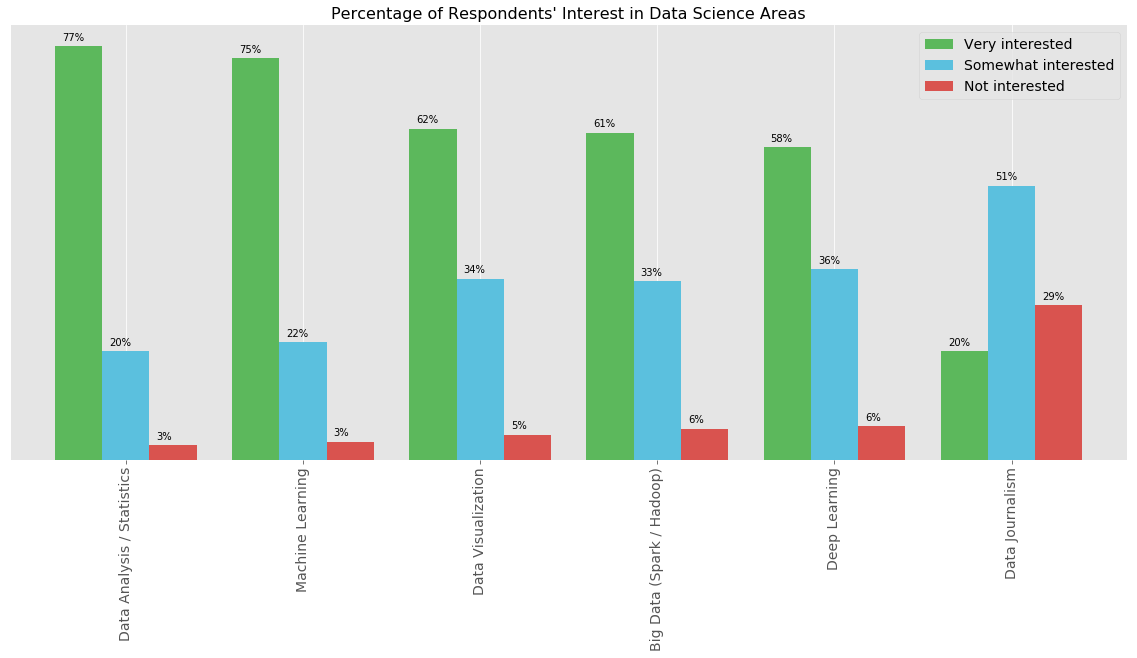

In [11]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (df_survey.div(df_survey.sum(1), axis=0)).plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=df_survey.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))